In [1]:
from nozzle_design import *

Input nozzle data: 

Inlet Pressure:  1500.0 kPa
Inlet Temperature:  2922.5785594350195 K
Thrust:  3000.0 N
Discretization:  100 
 

Input cooling data: 

Channel Height:  1.0 mm
Channel Width:  1.0 mm
Number of channels:  79.0
Coolant mass flow:  0.4706491754470024 kg/s
Coolant Temperature:  298.15 K
Coolant Pressure:  4000.0 kPa
Coolant Type:  Ethanol+Water
Coolant water fraction:  8.0 %
Wall conductivity:  401 W/mK
Wall thickness:  2.0 mm 
 

Nozzle design parameters: 

Throat diameter:  43.28123957077891 mm
Exit diameter:  75.77759003708302 mm
Epsilon:  3.06536502299609
Exit temperature:  1963.1898645536066 K
Exit Mach:  2.382138775999235
Exit velocity:  2117.3528663845345 m/s
Nozzle mass flow rate:  1.4168635033057202 kg/s
Specific Impulse (ISP):  215.83617394337762 s 
 

Coolant data: 

Coolant rho:  753.9726518045744
Coolant viscosity:  0.00038365725646327475
Coolant conductivity (k):  0.2807395989179949
Coolant Prandtl number (Pr):  4.398470100264557
Reynolds number:  15528.403

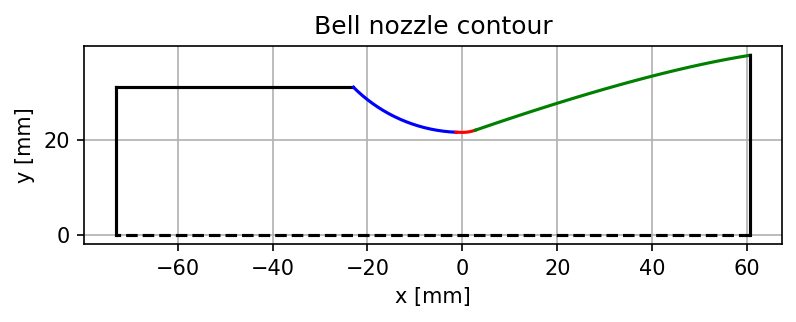

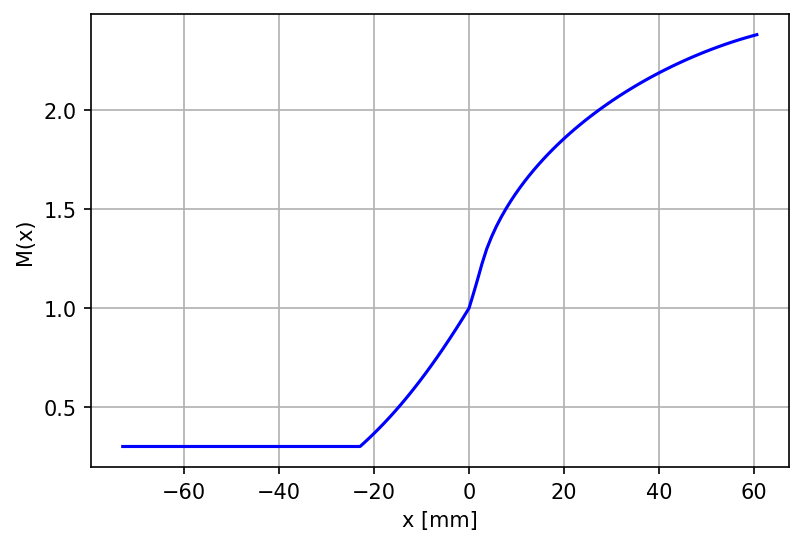

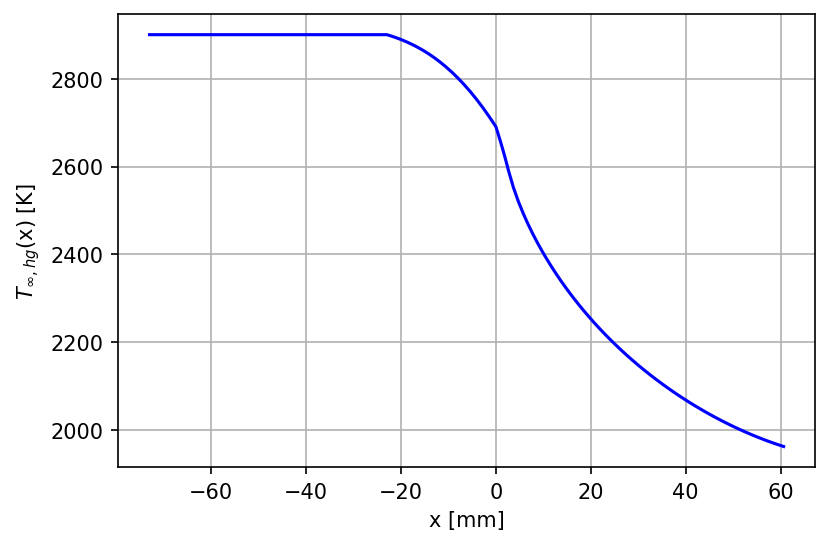

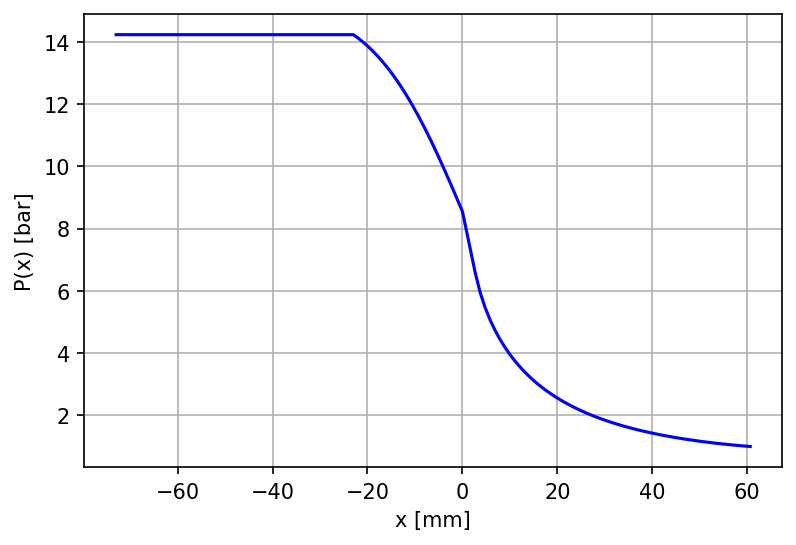

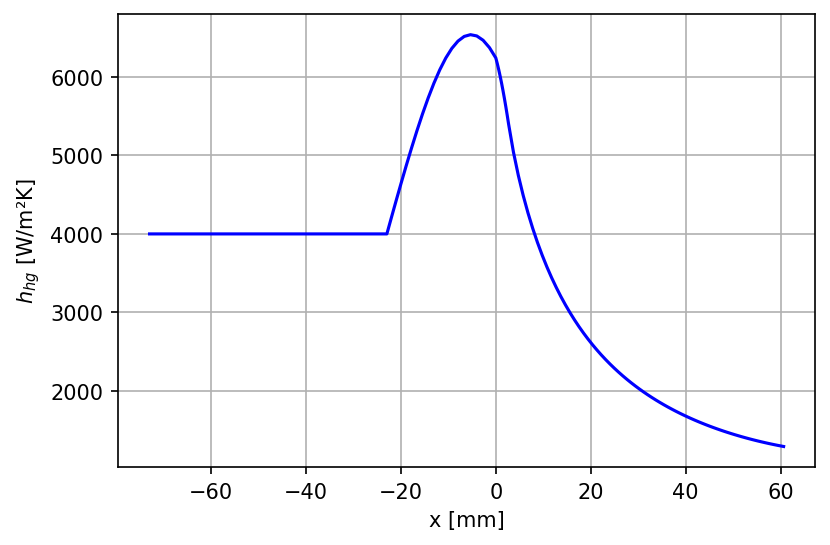

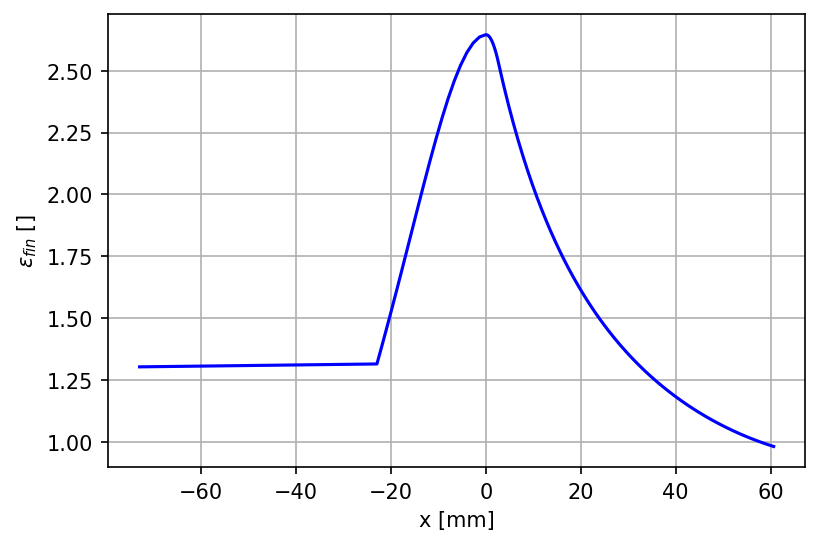

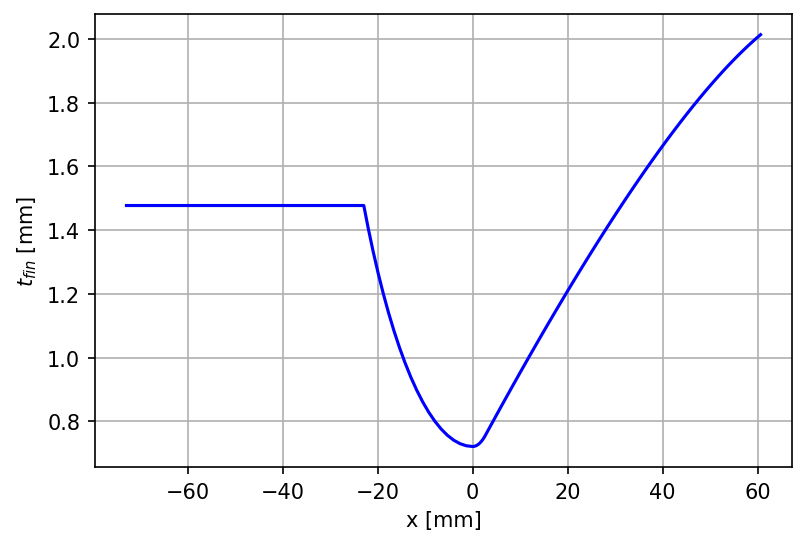

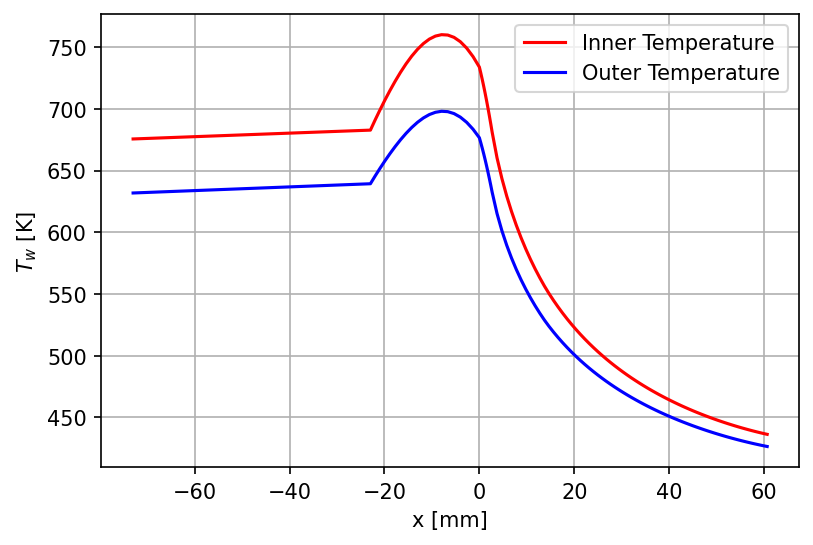

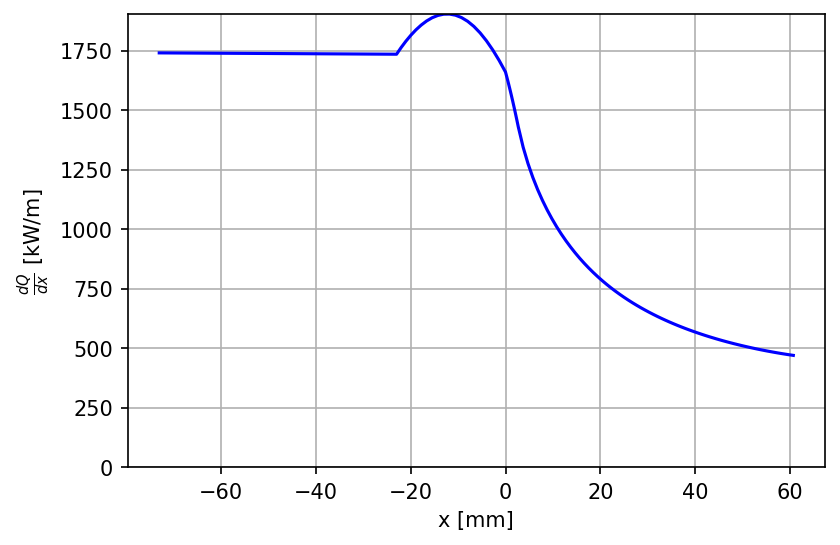

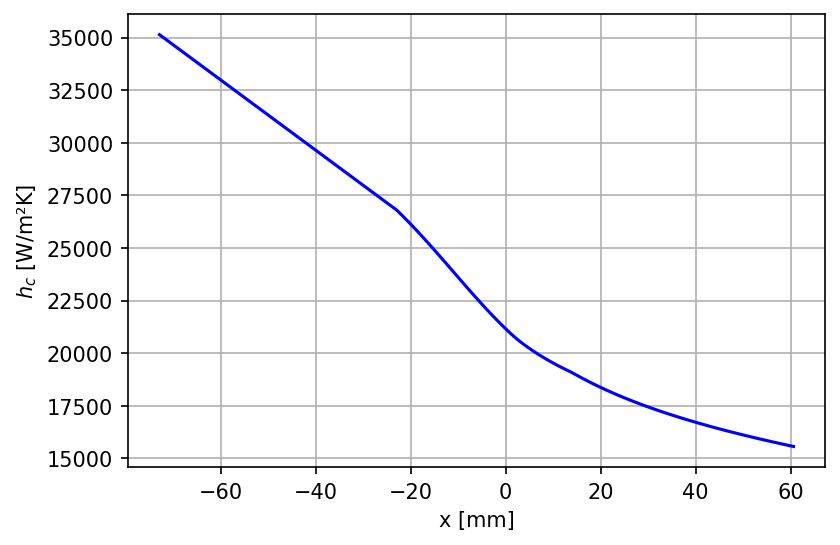

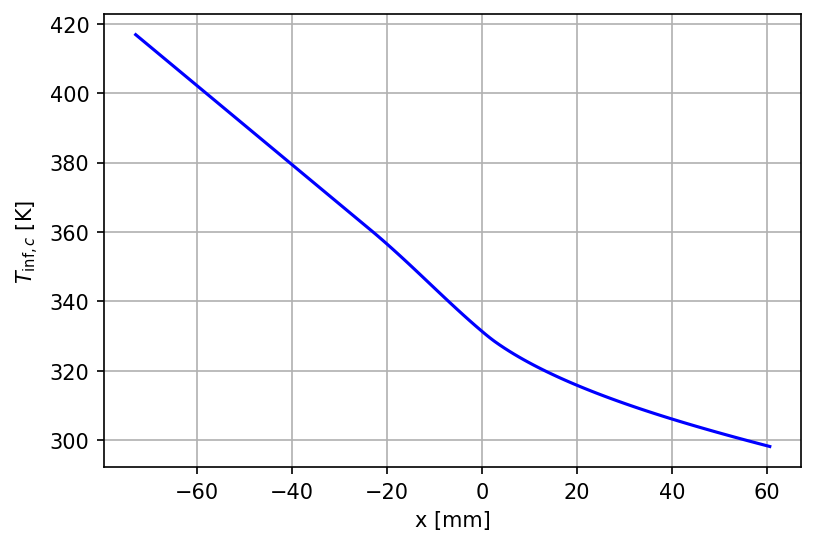

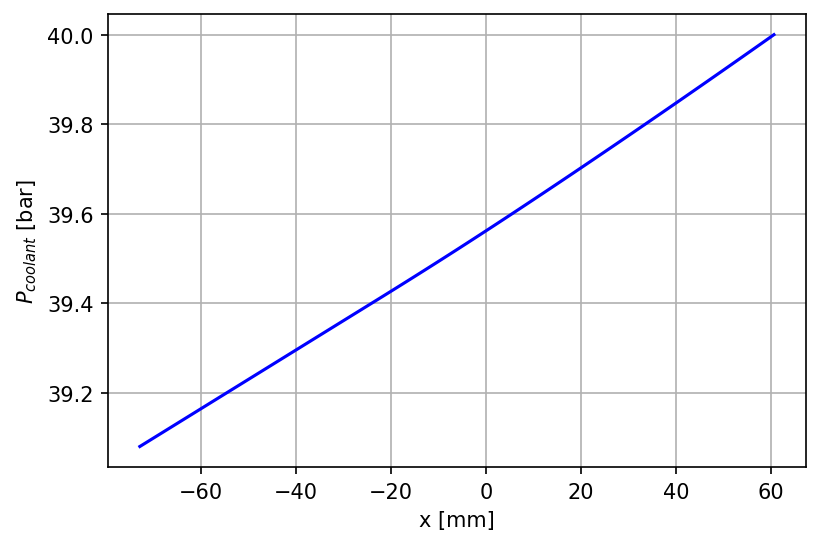

In [2]:
parameters = np.array([1.5e+06, 1.0e-03, 1.0e-03, 79, 8e-02, 1.5, 1.5, 3000])

inletPressure = parameters[0]
channelHeight = parameters[1]
channelWidth = parameters[2]
numberOfChannels = parameters[3]
coolantWaterFraction = parameters[4]
phi = parameters[5]
coolantExcess = parameters[6]
thrust = parameters[7]

exitPressure = 100000
gas = 'CombustionProducts'
k = 401
wallThickness = 2e-3
coolantType = 'Ethanol+Water'

x2 = round(coolantWaterFraction*100, 2)
x1 = 100 - x2
p_chamber = inletPressure/(10**5)
storage_pressure = inletPressure + 25e5

# Oxidizer
NOX =  Fluid(
    name='N2O', 
    coolprop_name='NitrousOxide', 
    formula=None, 
    fluid_type='oxidizer', 
    storage_temperature=298.15)

# Fuels
H2O = Fluid(
    name='H2O(L)', 
    coolprop_name='water', 
    formula='H 2 O 1', 
    fluid_type='fuel', 
    storage_pressure=storage_pressure,
    storage_temperature=298.15)

LC2H5OH = Fluid(
    name='C2H5OH(L)', 
    coolprop_name='ethanol', 
    formula='C 2 H 6 O 1', 
    fluid_type='fuel', 
    storage_pressure=storage_pressure, 
    storage_temperature=298.15)

H2O_C2H50H = FluidMixture(fluid1=LC2H5OH, x1=x1, fluid2=H2O, x2=x2)

NOELLE_motor = Motor(
    NOX,
    H2O_C2H50H,
    thrust = thrust,
    burn_time = 10,
    p_chamber = p_chamber,
    n_cstar = 1,
    n_cf = 1,
    cd_ox = 0.6,
    cd_fuel = 0.182,
    phi = phi
    )

inletTemperature = NOELLE_motor.To

NOELLE_Nozzle = Nozzle(
    inletPressure,
    inletTemperature,
    exitPressure,
    thrust,
    gas,
    motor=NOELLE_motor,
    n=100
    )

NOELLE_Nozzle.addCooling(
    channelHeight,
    channelWidth,
    numberOfChannels,
    coolantType,
    coolantWaterFraction,
    k,
    wallThickness,
    coolantExcess=coolantExcess,
    reverseDirection=True
    )

NOELLE_Nozzle.allInfo()

Input nozzle data: 

Inlet Pressure:  2345.74669 kPa
Inlet Temperature:  2950.8506509249737 K
Thrust:  2189.07408 N
Discretization:  100 
 

Input cooling data: 

Channel Height:  0.5 mm
Channel Width:  0.5 mm
Number of channels:  60.0
Coolant mass flow:  0.3225927678303444 kg/s
Coolant Temperature:  330 K
Coolant Pressure:  4845.746689999999 kPa
Coolant Type:  Ethanol+Water
Coolant water fraction:  8.0 %
Wall conductivity:  401 W/mK
Wall thickness:  2.0 mm 
 

Nozzle design parameters: 

Throat diameter:  28.690148389642374 mm
Exit diameter:  58.74076066916103 mm
Epsilon:  4.191925381293389
Exit temperature:  1834.9647686367045 K
Exit Mach:  2.6194506183574875
Exit velocity:  2254.1100771127985 m/s
Nozzle mass flow rate:  0.9711478167046301 kg/s
Specific Impulse (ISP):  229.77676627041777 s 
 

Coolant data: 

Coolant rho:  751.8158704537831
Coolant viscosity:  0.00037256302112081063
Coolant conductivity (k):  0.28470008747129283
Coolant Prandtl number (Pr):  4.24696177367027
Reynolds

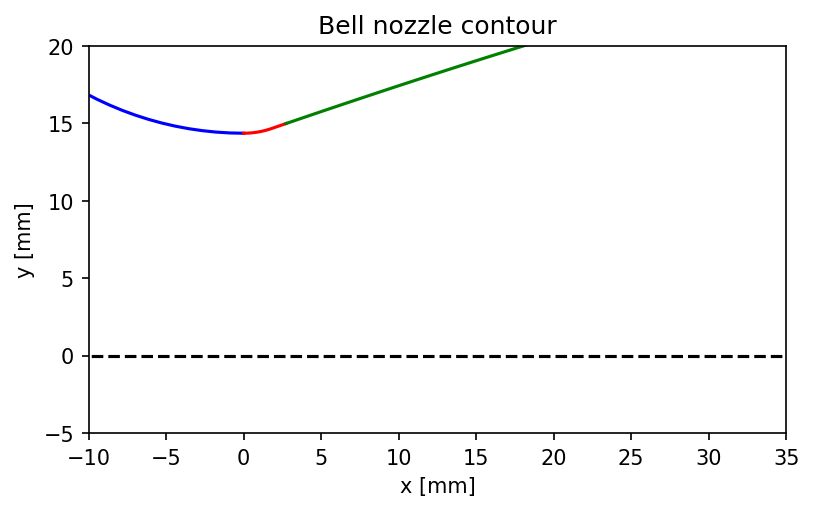

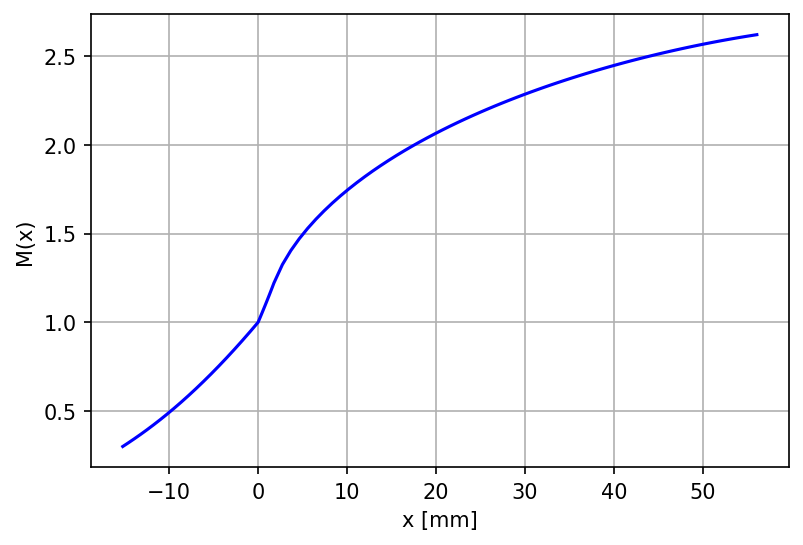

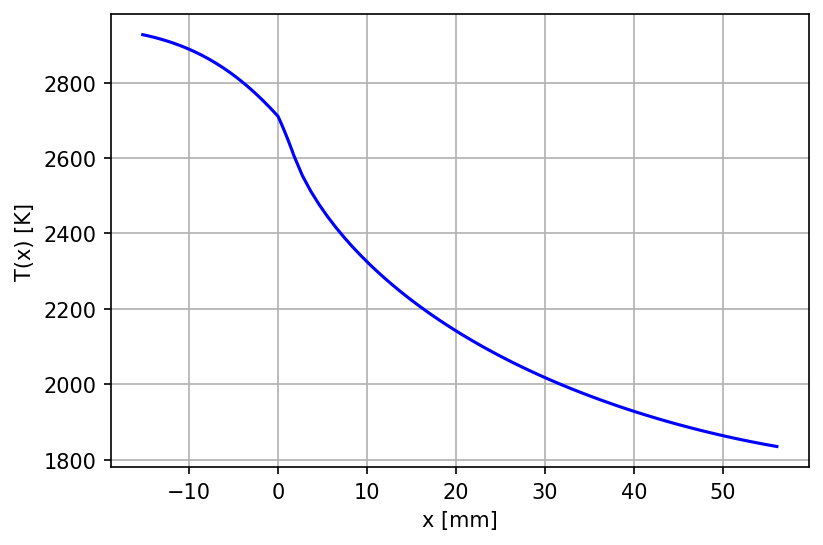

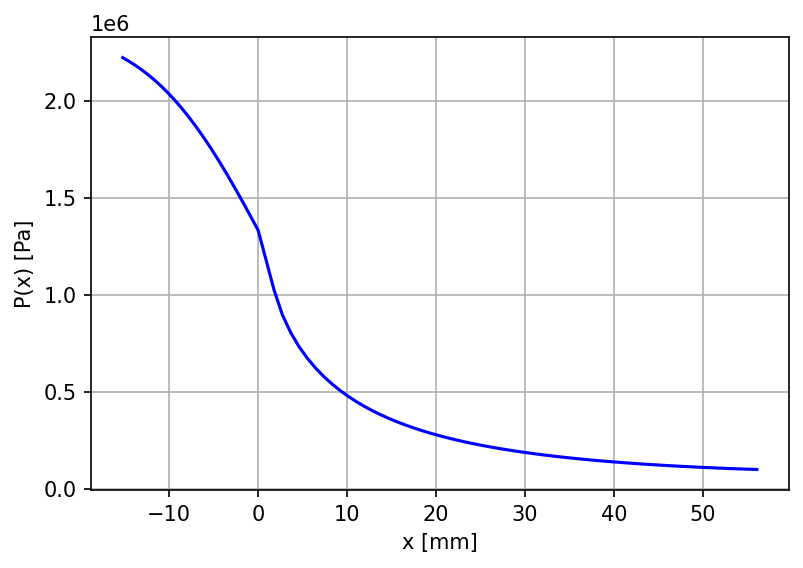

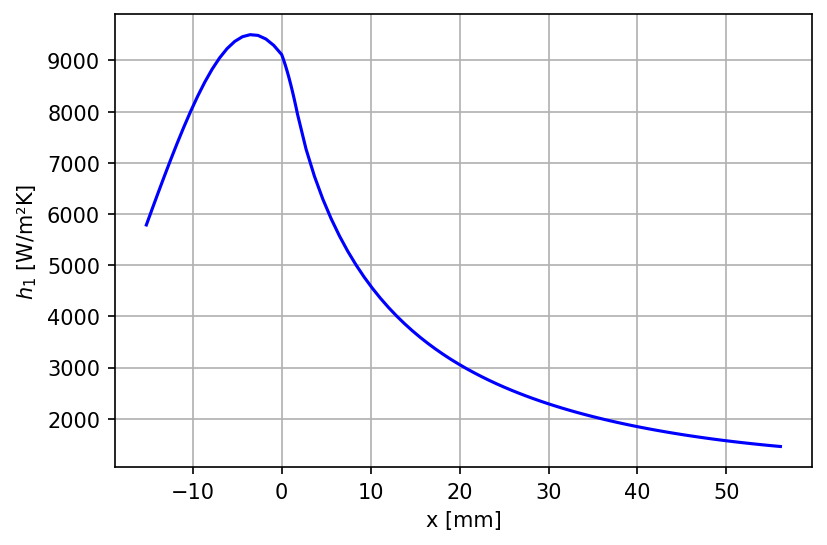

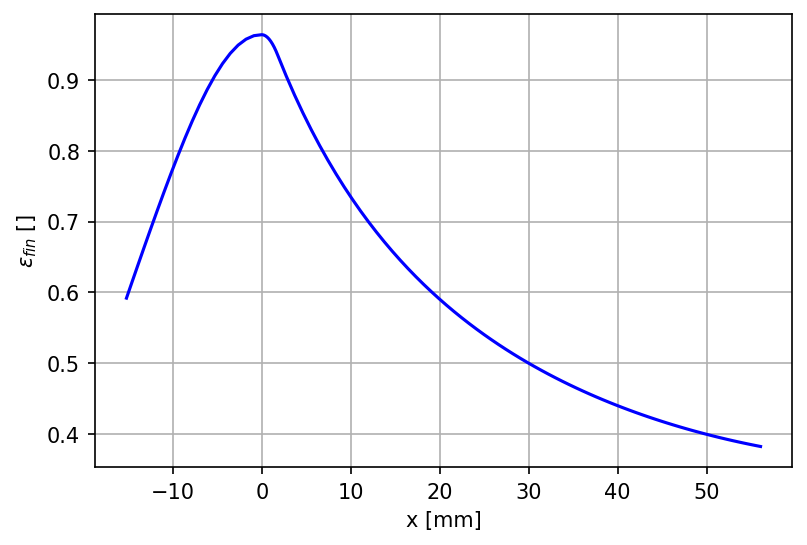

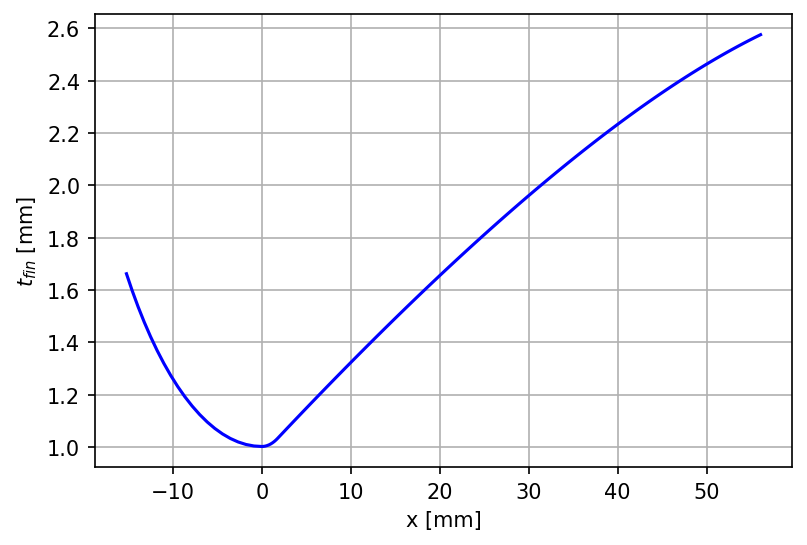

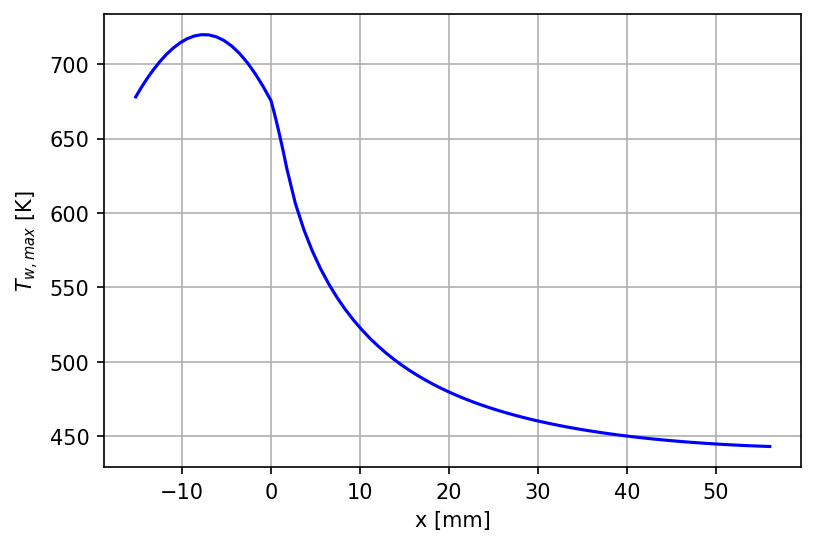

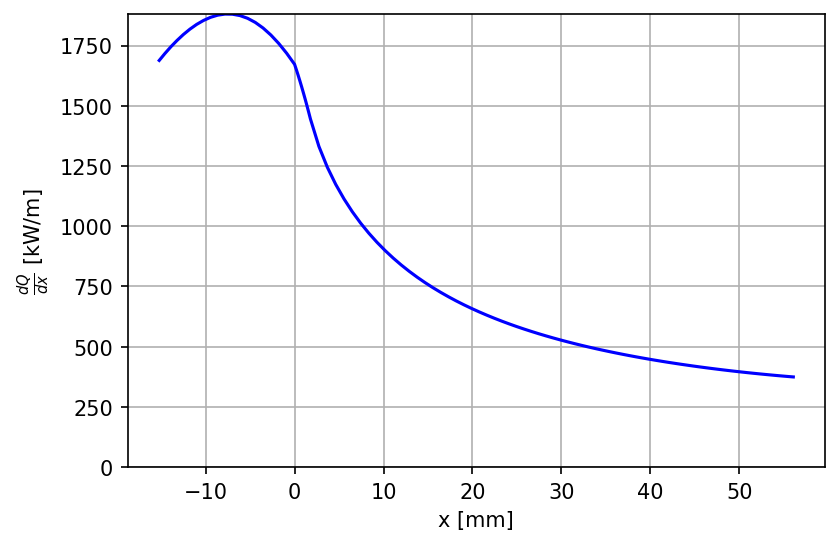

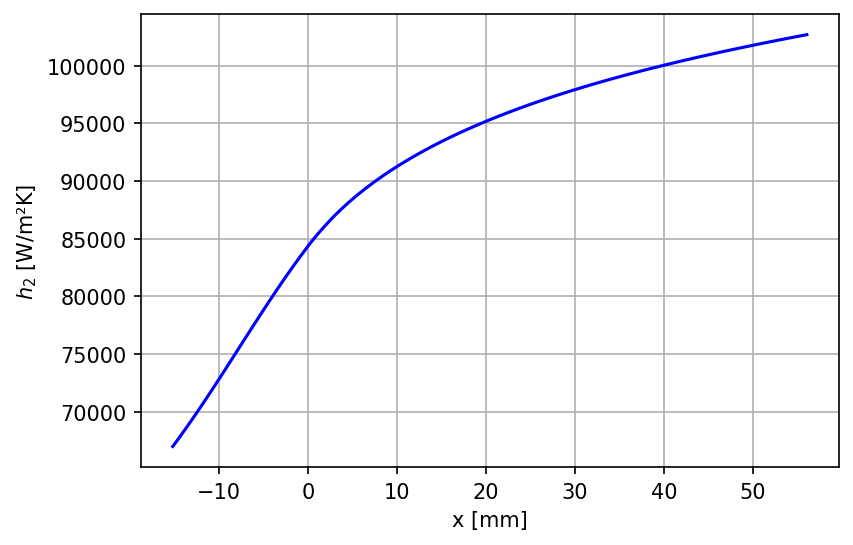

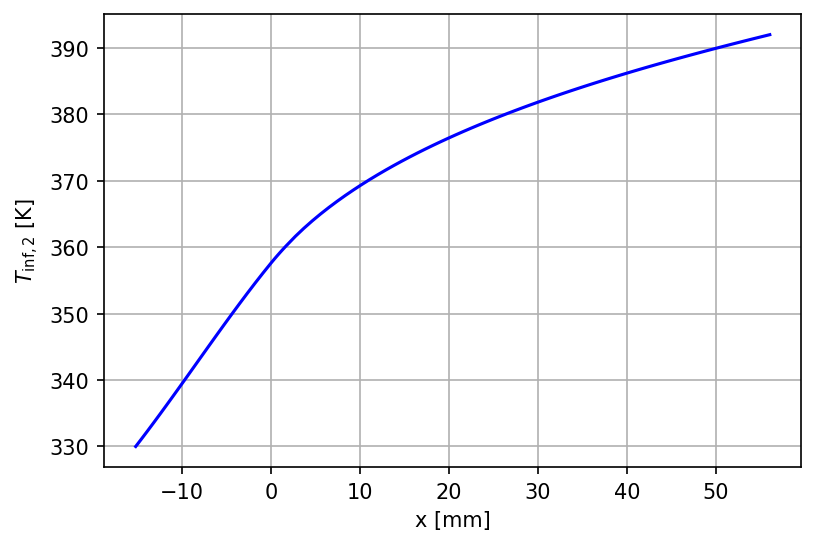

In [3]:
NOELLE_Nozzle2 = Nozzle(
    inletPressure,
    inletTemperature,
    exitPressure,
    thrust,
    gas,
    motor=NOELLE_motor,
    n=100
    )

NOELLE_Nozzle2.addCooling(
    channelHeight,
    channelWidth,
    numberOfChannels,
    coolantType,
    coolantWaterFraction,
    k,
    wallThickness,
    coolantExcess=coolantExcess,
    reverseDirection=False
    )

NOELLE_Nozzle2.allInfo()

Input nozzle data: 

Inlet Pressure:  2345.74669 kPa
Inlet Temperature:  2950.8506509249737 K
Thrust:  2189.07408 N
Discretization:  100 
 

Input cooling data: 

Channel Height:  0.5 mm
Channel Width:  0.5 mm
Number of channels:  60.0
Coolant mass flow:  0.3225927678303444 kg/s
Coolant Temperature:  330 K
Coolant Pressure:  4845.746689999999 kPa
Coolant Type:  Ethanol+Water
Coolant water fraction:  8.0 %
Wall conductivity:  401 W/mK
Wall thickness:  2.0 mm 
 

Nozzle design parameters: 

Throat diameter:  28.690148389642374 mm
Exit diameter:  58.74076066916103 mm
Epsilon:  4.191925381293389
Exit temperature:  1834.9647686367045 K
Exit Mach:  2.6194506183574875
Exit velocity:  2254.1100771127985 m/s
Nozzle mass flow rate:  0.9711478167046301 kg/s
Specific Impulse (ISP):  229.77676627041777 s 
 

Coolant data: 

Coolant rho:  781.3745032990915
Coolant viscosity:  0.0005280135585910514
Coolant conductivity (k):  0.24771976662946743
Coolant Prandtl number (Pr):  6.39002714775021
Reynolds 

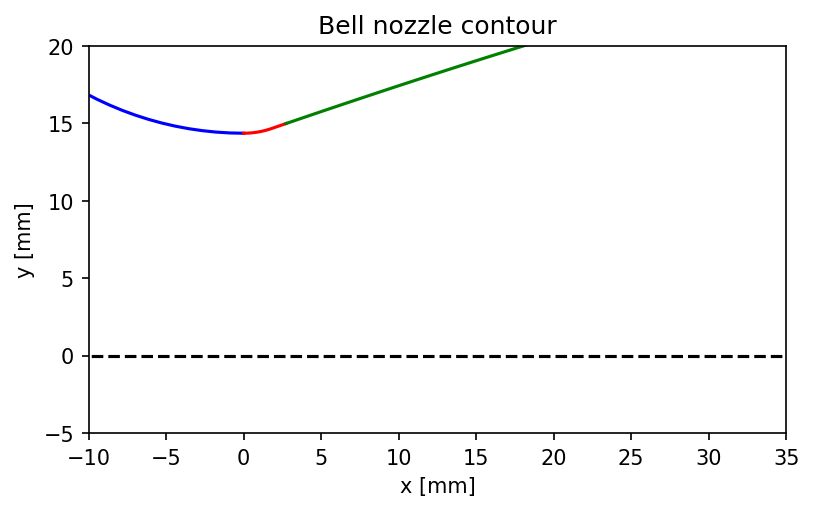

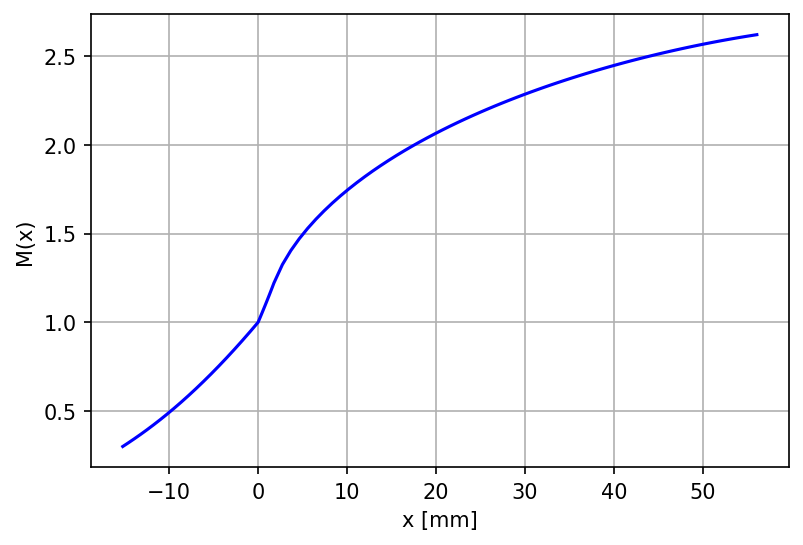

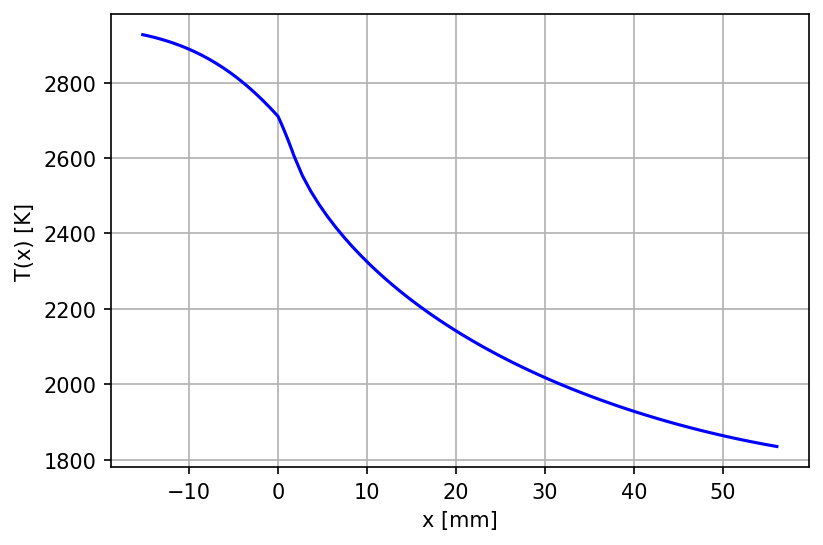

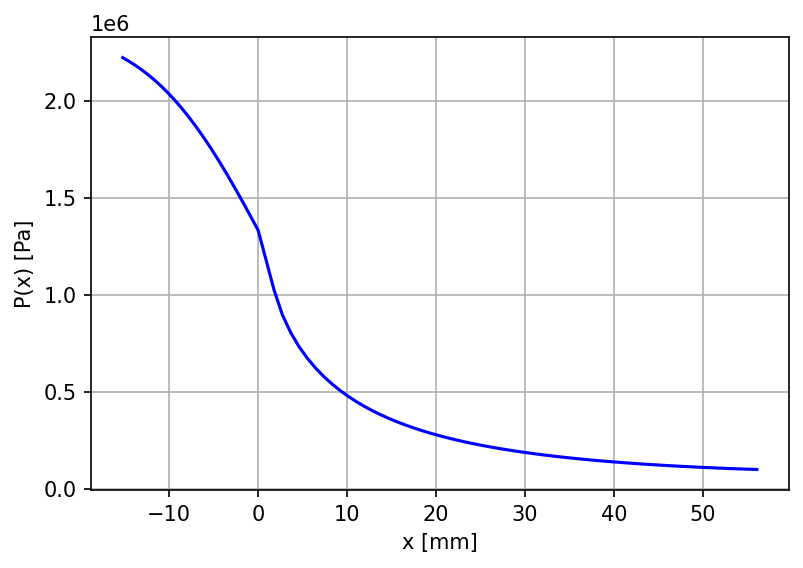

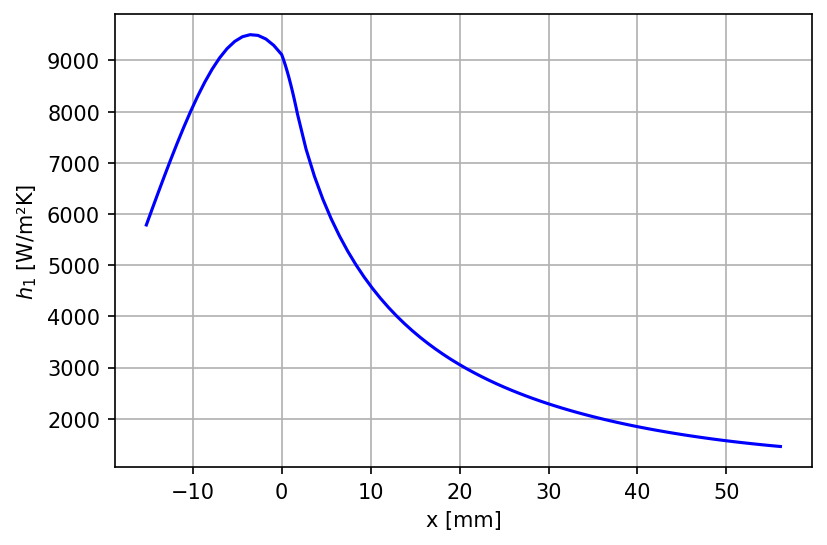

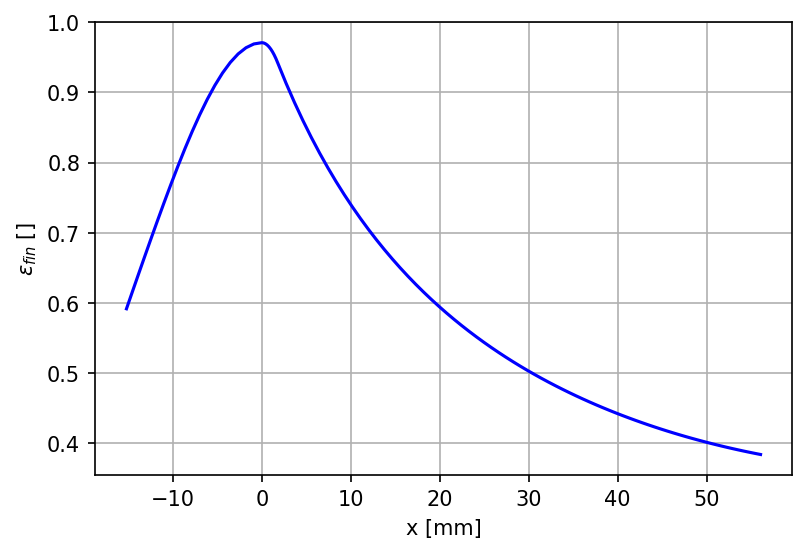

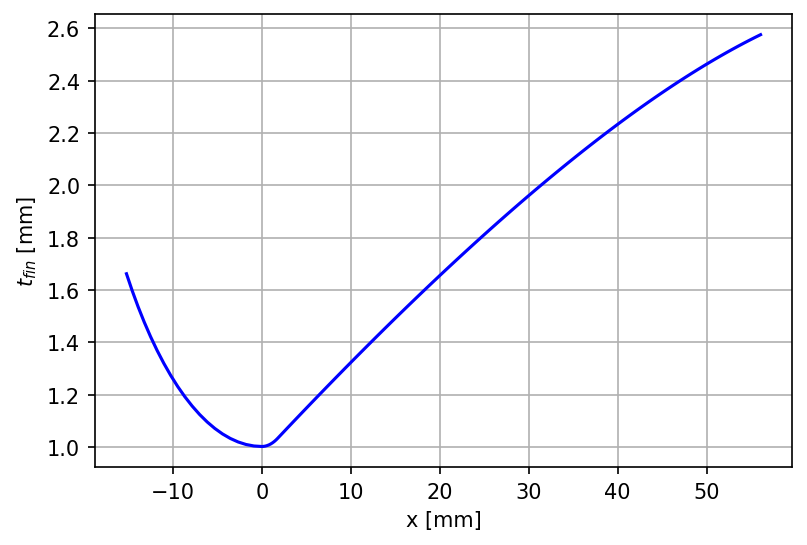

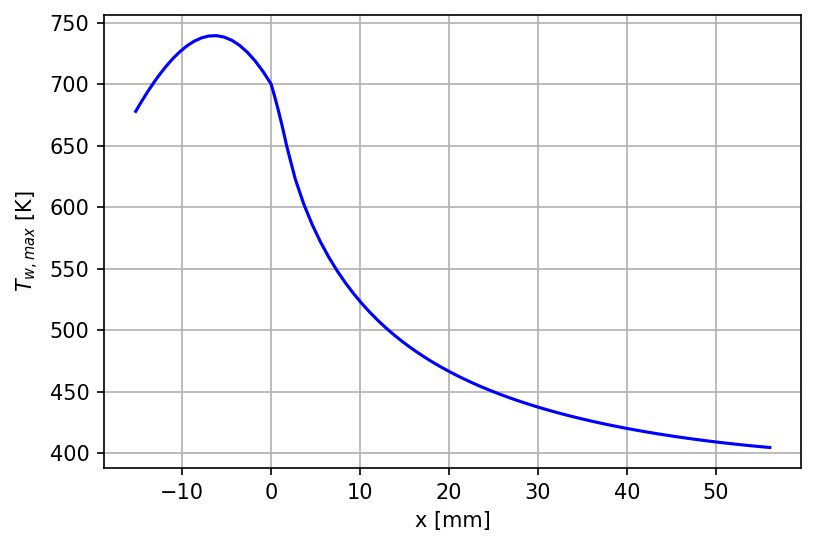

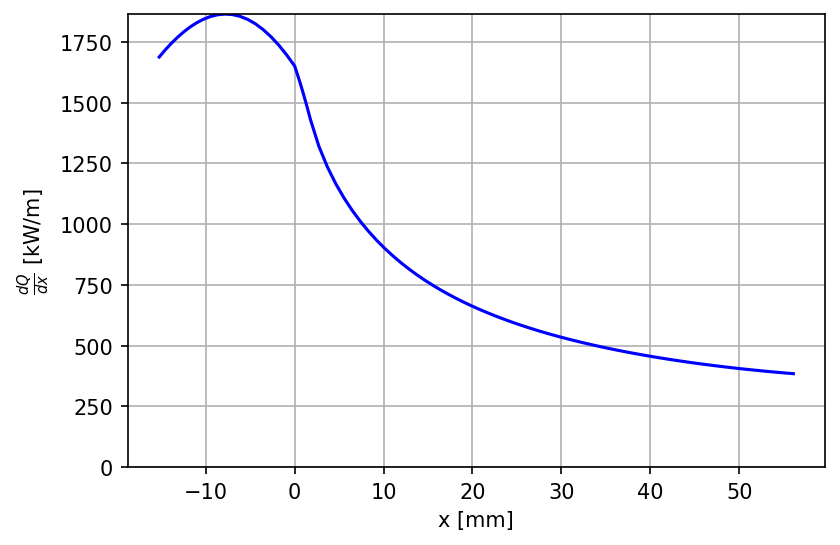

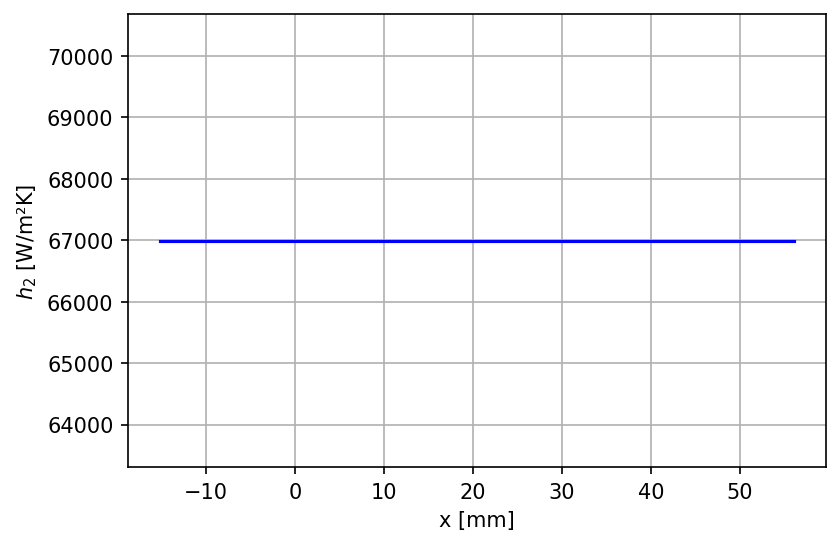

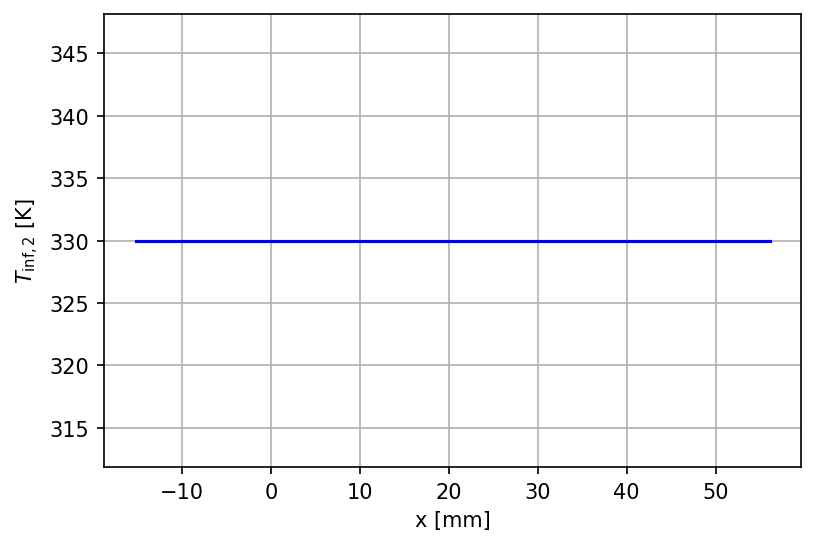

In [4]:
NOELLE_Nozzle3 = Nozzle(
    inletPressure,
    inletTemperature,
    exitPressure,
    thrust,
    gas,
    motor=NOELLE_motor,
    n=100
    )

NOELLE_Nozzle3.addCooling(
    channelHeight,
    channelWidth,
    numberOfChannels,
    coolantType,
    coolantWaterFraction,
    k,
    wallThickness,
    coolantExcess=coolantExcess,
    constantCoolantH=True,
    reverseDirection=False
    )

NOELLE_Nozzle3.allInfo()

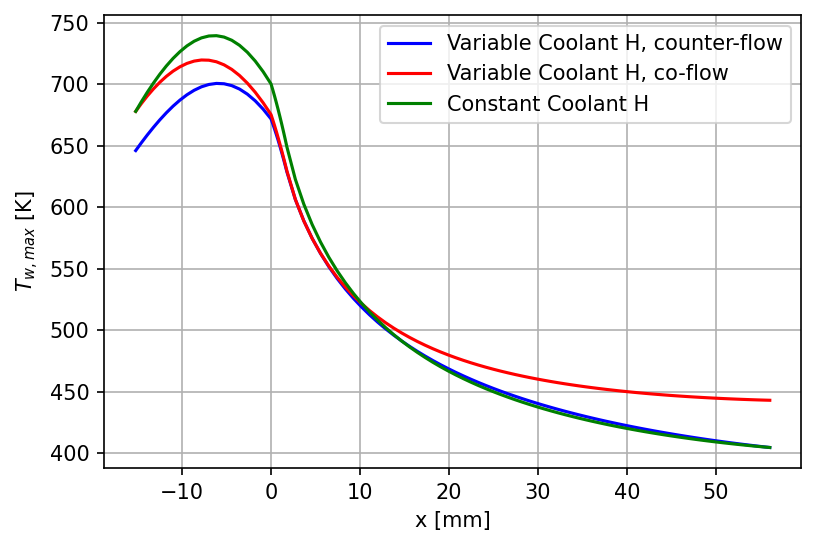

In [5]:
plt.figure(dpi=150)
plt.plot(1000*np.array(NOELLE_Nozzle.xGeometry), NOELLE_Nozzle.wallTemperatureFunction, 'b', label='Variable Coolant H, counter-flow')
plt.plot(1000*np.array(NOELLE_Nozzle2.xGeometry), NOELLE_Nozzle2.wallTemperatureFunction, 'r', label='Variable Coolant H, co-flow')
plt.plot(1000*np.array(NOELLE_Nozzle3.xGeometry), NOELLE_Nozzle3.wallTemperatureFunction, 'g', label='Constant Coolant H')
plt.xlabel("x [mm]")
plt.ylabel(r"$T_{w, max}$ [K]")
plt.grid(True)
plt.legend()
#plt.savefig('wall_temp_profile.png', dpi=300)
plt.show()

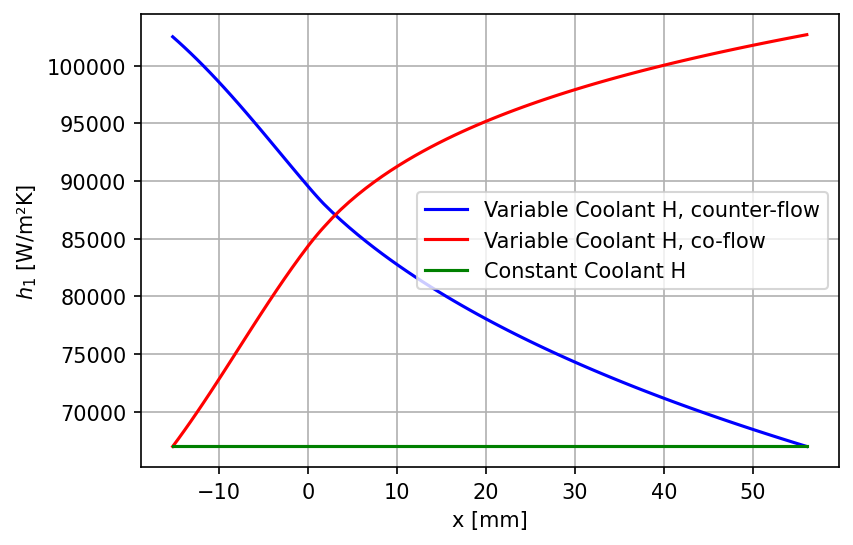

In [6]:
plt.figure(dpi=150)
plt.plot(1000*np.array(NOELLE_Nozzle.xGeometry), NOELLE_Nozzle.channelHFunction, 'b', label='Variable Coolant H, counter-flow')
plt.plot(1000*np.array(NOELLE_Nozzle2.xGeometry), NOELLE_Nozzle2.channelHFunction, 'r', label='Variable Coolant H, co-flow')
plt.plot(1000*np.array(NOELLE_Nozzle3.xGeometry), NOELLE_Nozzle3.channelHFunction, 'g', 
label='Constant Coolant H')
plt.xlabel("x [mm]")
plt.ylabel(r"$h_{1}$ [W/m²K]")
plt.grid(True)
plt.legend()
#plt.savefig('wall_temp_profile.png', dpi=300)
plt.show()